In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/Coffee Shop Sales.csv")
df.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,30-06-2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,30-06-2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,30-06-2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,30-06-2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,30-06-2023,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


We don't require transaction_time and transaction_id so dropping it...

In [3]:
df.drop(columns=(["transaction_time", "transaction_id"]), axis=1, inplace=True)

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_date  149116 non-null  object 
 1   transaction_qty   149116 non-null  int64  
 2   store_id          149116 non-null  int64  
 3   store_location    149116 non-null  object 
 4   product_id        149116 non-null  int64  
 5   unit_price        149116 non-null  float64
 6   product_category  149116 non-null  object 
 7   product_type      149116 non-null  object 
 8   product_detail    149116 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 10.2+ MB


Checking null values..

In [5]:
df.isnull().sum() #no null values...

transaction_date    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [6]:
df.describe()

,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000
mean,1.438276,5.342063,47.918607,3.382219
std,0.542509,2.074241,17.930020,2.658723
min,1.000000,3.000000,1.000000,0.800000
25%,1.000000,3.000000,33.000000,2.500000
50%,1.000000,5.000000,47.000000,3.000000
75%,2.000000,8.000000,60.000000,3.750000
max,8.000000,8.000000,87.000000,45.000000


Converting type of columns transaction date and time....

In [7]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"], dayfirst=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_date  149116 non-null  datetime64[ns]
 1   transaction_qty   149116 non-null  int64         
 2   store_id          149116 non-null  int64         
 3   store_location    149116 non-null  object        
 4   product_id        149116 non-null  int64         
 5   unit_price        149116 non-null  float64       
 6   product_category  149116 non-null  object        
 7   product_type      149116 non-null  object        
 8   product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 10.2+ MB


Let's make the weekly dataset....

In [9]:
'''# Extract month, week, and day of the week
df["month"] = df["transaction_date"].dt.month
df["week"] = df["transaction_date"].dt.isocalendar().week
df["day_of_week"] = df["transaction_date"].dt.day_name()'''

'# Extract month, week, and day of the week\ndf["month"] = df["transaction_date"].dt.month\ndf["week"] = df["transaction_date"].dt.isocalendar().week\ndf["day_of_week"] = df["transaction_date"].dt.day_name()'

In [10]:
df.head(20)

,transaction_date,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,2023-01-01,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2023-01-01,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,2023-01-01,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,2023-01-01,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,2023-01-01,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
5,2023-01-01,1,5,Lower Manhattan,77,3.00,Bakery,Scone,Oatmeal Scone
6,2023-01-01,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
7,2023-01-01,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
8,2023-01-01,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg
9,2023-01-01,2,5,Lower Manhattan,58,3.50,Drinking Chocolate,Hot chocolate,Dark chocolate Rg


In [11]:
# Group by transaction_date, store_id, and product_category, and sum transaction_qty....
grouped_data = df.groupby(['transaction_date', 'store_id', 'product_id']).agg({'transaction_qty': 'sum'}).reset_index()

# Aggregate to weekly data...
weekly_data = grouped_data.groupby([pd.Grouper(key='transaction_date', freq='W-MON'), 'store_id', 'product_id']).agg({'transaction_qty': 'sum'}).reset_index()

In [12]:
weekly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  5845 non-null   datetime64[ns]
 1   store_id          5845 non-null   int64         
 2   product_id        5845 non-null   int64         
 3   transaction_qty   5845 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 182.8 KB


In [13]:
df = weekly_data

Outliers

In [14]:
df.head()

,transaction_date,store_id,product_id,transaction_qty
0,2023-01-02,3,22,15
1,2023-01-02,3,23,17
2,2023-01-02,3,24,20
3,2023-01-02,3,25,12
4,2023-01-02,3,26,15


In [15]:
df.columns 

Index(['transaction_date', 'store_id', 'product_id', 'transaction_qty'], dtype='object')

#### Note: store_id cover location, product_id covers category, type and detail, and we are not forecasting sales so no requirement for unit price....

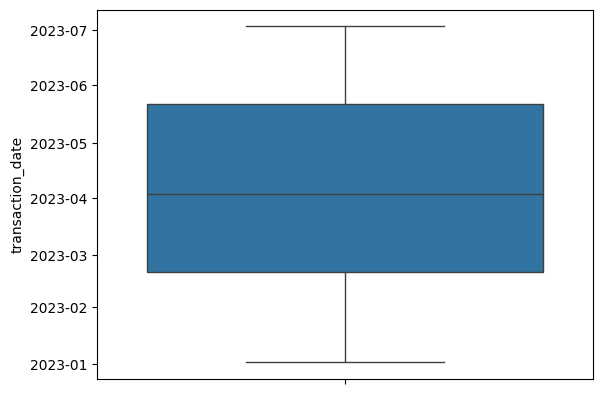

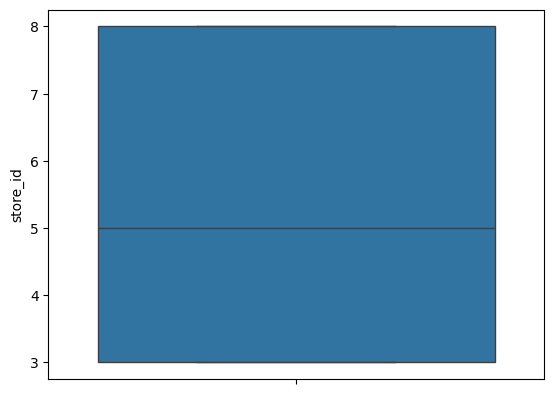

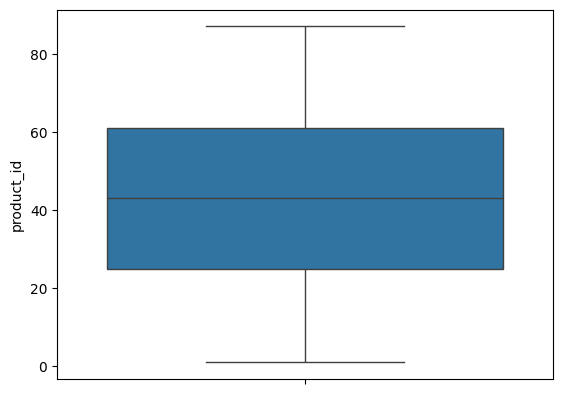

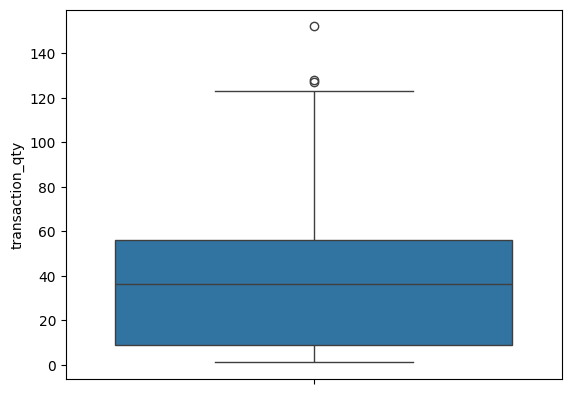

In [16]:
columns = ['transaction_date', 'store_id', 'product_id','transaction_qty']
for col in columns:
    sns.boxplot(data=df[col])
    plt.show()

In [17]:
def outlier_details(column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - 1.5 * iqr
    hf = q3 + 1.5 * iqr
    outliers = df[(df[column] < lf) | (df[column] > hf)]
    return lf, hf, outliers

In [18]:
columns = ['transaction_qty']
for col in columns:
    lf, hf, outliers = outlier_details(column=col)
    print(f"column = {col}, lf = {lf}, hf = {hf}, number of outliers = {len(outliers)}")

column = transaction_qty, lf = -61.5, hf = 126.5, number of outliers = 3


In [19]:
df.head()

,transaction_date,store_id,product_id,transaction_qty
0,2023-01-02,3,22,15
1,2023-01-02,3,23,17
2,2023-01-02,3,24,20
3,2023-01-02,3,25,12
4,2023-01-02,3,26,15


In [20]:
df.describe()

,transaction_date,store_id,product_id,transaction_qty
count,5845,5845.000000,5845.000000,5845.000000
mean,2023-04-04 19:49:56.407185408,5.375535,43.036441,36.692900
min,2023-01-02 00:00:00,3.000000,1.000000,1.000000
25%,2023-02-20 00:00:00,3.000000,25.000000,9.000000
50%,2023-04-03 00:00:00,5.000000,43.000000,36.000000
75%,2023-05-22 00:00:00,8.000000,61.000000,56.000000
max,2023-07-03 00:00:00,8.000000,87.000000,152.000000
std,NaN,2.048801,23.290958,27.274499


In [21]:
outliers

,transaction_date,store_id,product_id,transaction_qty
5412,2023-06-19,8,87,127
5566,2023-06-26,5,87,152
5645,2023-06-26,8,87,128


In [22]:
outliers["transaction_date"].dt.day_name()

5412    Monday
5566    Monday
5645    Monday
Name: transaction_date, dtype: object

# Handling Outliers...

capping outliers with upper fence limit which is 126.5 for transaction_qty

In [23]:
upper_fence = 126.5
df['transaction_qty'] = df['transaction_qty'].apply(lambda x: min(x, upper_fence))

In [24]:
columns = ['transaction_qty']
for col in columns:
    lf, hf, outliers = outlier_details(column=col)
    print(f"column = {col}, lf = {lf}, hf = {hf}, number of outliers = {len(outliers)}")

column = transaction_qty, lf = -61.5, hf = 126.5, number of outliers = 0


<Axes: ylabel='transaction_qty'>

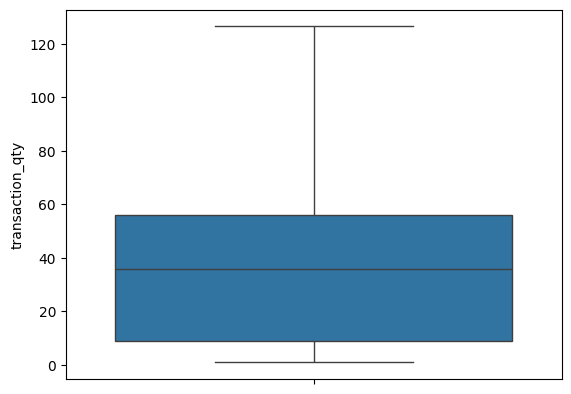

In [25]:
sns.boxplot(data=df['transaction_qty'])

In [26]:
df.describe()

,transaction_date,store_id,product_id,transaction_qty
count,5845,5845.000000,5845.000000,5845.000000
mean,2023-04-04 19:49:56.407185408,5.375535,43.036441,36.688195
min,2023-01-02 00:00:00,3.000000,1.000000,1.000000
25%,2023-02-20 00:00:00,3.000000,25.000000,9.000000
50%,2023-04-03 00:00:00,5.000000,43.000000,36.000000
75%,2023-05-22 00:00:00,8.000000,61.000000,56.000000
max,2023-07-03 00:00:00,8.000000,87.000000,126.500000
std,NaN,2.048801,23.290958,27.256951


Visualizing Trend...

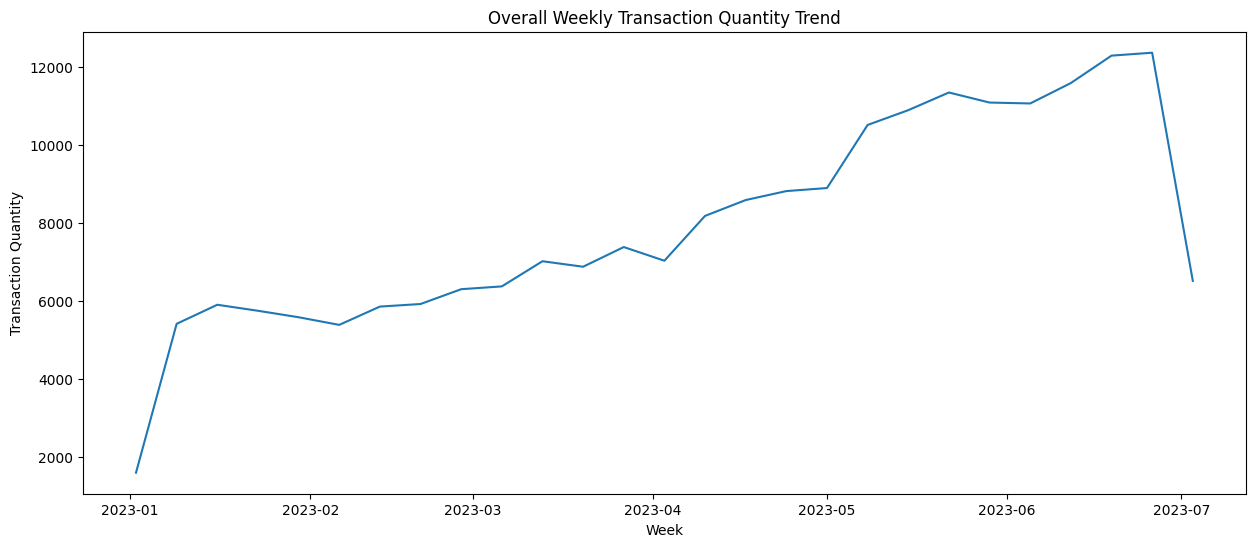

In [27]:
# Plot the overall weekly transaction trend
plt.figure(figsize=(15, 6))
sns.lineplot(data=weekly_data, x='transaction_date', y='transaction_qty', estimator='sum', errorbar=None)
plt.title('Overall Weekly Transaction Quantity Trend')
plt.xlabel('Week')
plt.ylabel('Transaction Quantity')
plt.show()

In [28]:
df.head(168)

,transaction_date,store_id,product_id,transaction_qty
0,2023-01-02,3,22,15.0
1,2023-01-02,3,23,17.0
2,2023-01-02,3,24,20.0
3,2023-01-02,3,25,12.0
4,2023-01-02,3,26,15.0
...,...,...,...,...
163,2023-01-09,3,12,2.0
164,2023-01-09,3,13,1.0
165,2023-01-09,3,15,1.0
166,2023-01-09,3,16,2.0


In [29]:
df.shape

(5845, 4)

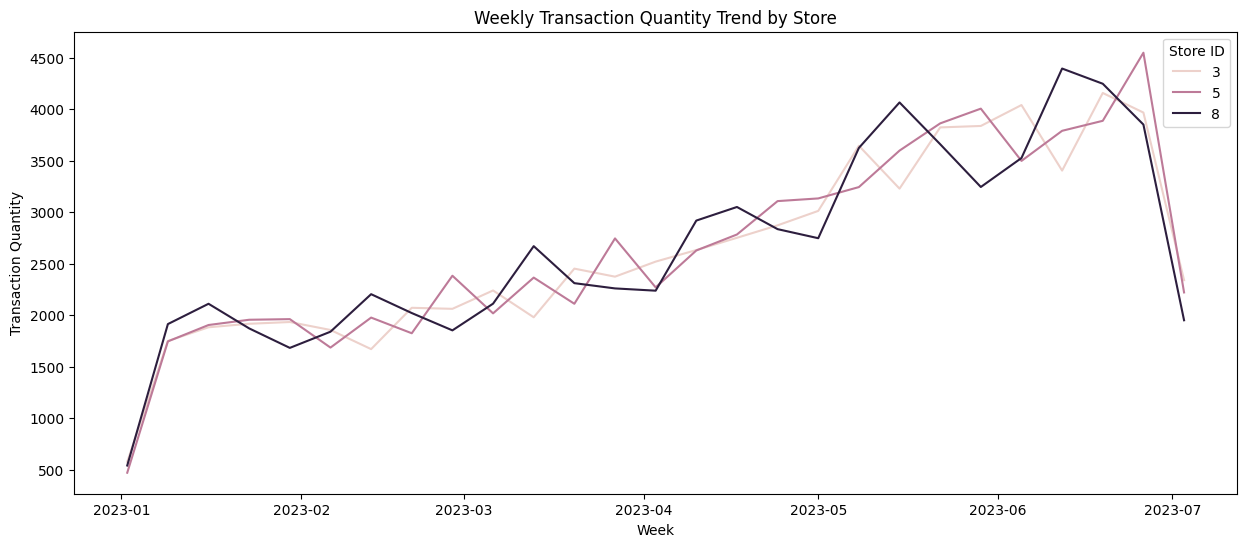

In [30]:
# Plot weekly transactions by store
plt.figure(figsize=(15, 6))
sns.lineplot(data=weekly_data, x='transaction_date', y='transaction_qty', hue='store_id', estimator='sum', errorbar=None)
plt.title('Weekly Transaction Quantity Trend by Store')
plt.xlabel('Week')
plt.ylabel('Transaction Quantity')
plt.legend(title='Store ID')
plt.show()

Plotting the distribution of transaction quantities..

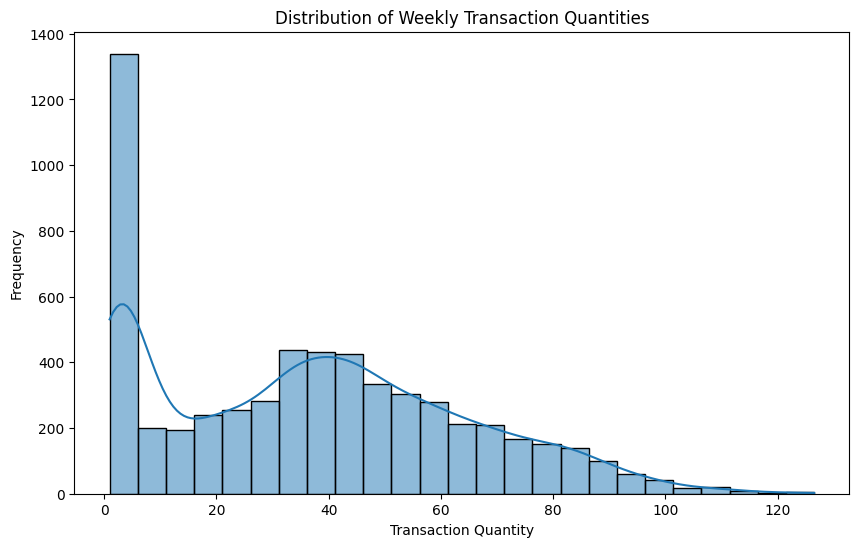

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_qty'], kde=True)
plt.title('Distribution of Weekly Transaction Quantities')
plt.xlabel('Transaction Quantity')
plt.ylabel('Frequency')
plt.show()

```
Notes: Distribution checks (like histograms) are more common in traditional datasets (e.g., classification or regression) to observe the spread of values.
But in time series, distribution alone doesn’t capture how data evolves over time, which is critical for forecasting.

# Feature Selection

In [32]:
df["transaction_date"]

0      2023-01-02
1      2023-01-02
2      2023-01-02
3      2023-01-02
4      2023-01-02
          ...    
5840   2023-07-03
5841   2023-07-03
5842   2023-07-03
5843   2023-07-03
5844   2023-07-03
Name: transaction_date, Length: 5845, dtype: datetime64[ns]

In [33]:
# feature 1: month
df["month"] = df["transaction_date"].dt.month

In [34]:
# feature 2: week
df["week"] = df["transaction_date"].dt.isocalendar().week

In [35]:
# feature 3: quarter
df["quarter"] = df["transaction_date"].dt.quarter

In [36]:
df.head()

,transaction_date,store_id,product_id,transaction_qty,month,week,quarter
0,2023-01-02,3,22,15.0,1,1,1
1,2023-01-02,3,23,17.0,1,1,1
2,2023-01-02,3,24,20.0,1,1,1
3,2023-01-02,3,25,12.0,1,1,1
4,2023-01-02,3,26,15.0,1,1,1


In [37]:
df.columns

Index(['transaction_date', 'store_id', 'product_id', 'transaction_qty',
       'month', 'week', 'quarter'],
      dtype='object')

#### Lag features..
```
Lag features are previous values of your target variable (transaction_qty) shifted by one or more time steps.
For example:
lag_1: Transaction quantity from the previous week.
lag_2: Transaction quantity from two weeks ago.


Note: Lags contain NaN values due to store_id and product_id. Wherever a gap is present, a NaN value appears, so we are proceeding without using lags.

In [38]:
# df['lag_1'] = df.groupby(['store_id', 'product_id'])['transaction_qty'].shift(1)
# df['lag_2'] = df.groupby(['store_id', 'product_id'])['transaction_qty'].shift(2)
# df.iloc[290:]

```
What is Stationarity?
A stationary time series has constant statistical properties over time:
Constant mean, variance, and no seasonality or trends.
Why is it important?
Most time series models (like SARIMA) assume that the data is stationary. If it isn’t, we need to transform it (e.g., differencing).

ADF Test (Augmented Dickey-Fuller Test):
What it does:
Checks whether a time series is stationary.
How it works:
Null Hypothesis (H0): Time series is non-stationary.
Alternative Hypothesis (H1): Time series is stationary.
If p-value < 0.05 → Reject H0 → Data is stationary.
If p-value ≥ 0.05 → Fail to reject H0 → Data is non-stationary (needs differencing).


In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
# Perform ADF test...
result = adfuller(df['transaction_qty'])
print(f"p-value ={result[1]}")

p-value =1.4888175885518552e-28


p-value < 0.05 so time series is stationary and no differencing is required for modeling

#### How SARIMA(Seasonal Autoregressive Integrated Moving Average) Works:
```
AR terms use past observations.
MA terms use past errors.
Differencing removes trends/seasonality.
Seasonal terms account for repeating patterns (e.g., weekly, monthly).
Model combines all these elements to make accurate forecasts.

#### ACF and PACF
```
ACF (Autocorrelation Function):
Measures the correlation between the time series and its lagged versions.
Shows how much current values depend on past values at different lags.
Use: Helps identify the order of the Moving Average (MA) part (q) in SARIMA.

PACF (Partial Autocorrelation Function):
Measures the direct correlation between the series and its lags, removing the effects of intermediate lags.
Shows the pure influence of a lag on the current value.
Use: Helps identify the order of the Autoregressive (AR) part (p) in SARIMA.

ACF → Identifies q (MA order) by checking how many lags influence the series.
PACF → Identifies p (AR order) by seeing how many past observations directly influence the current one.


In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

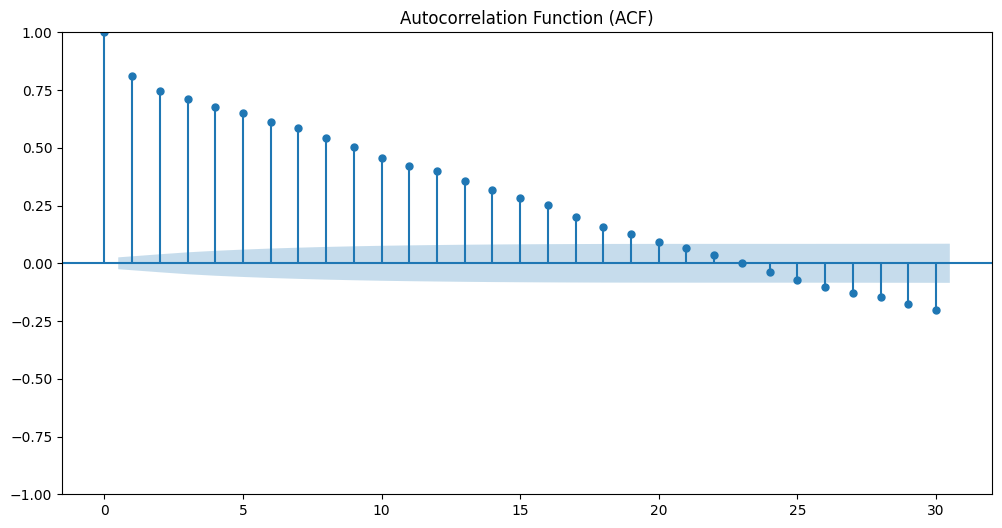

In [42]:
# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(df['transaction_qty'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

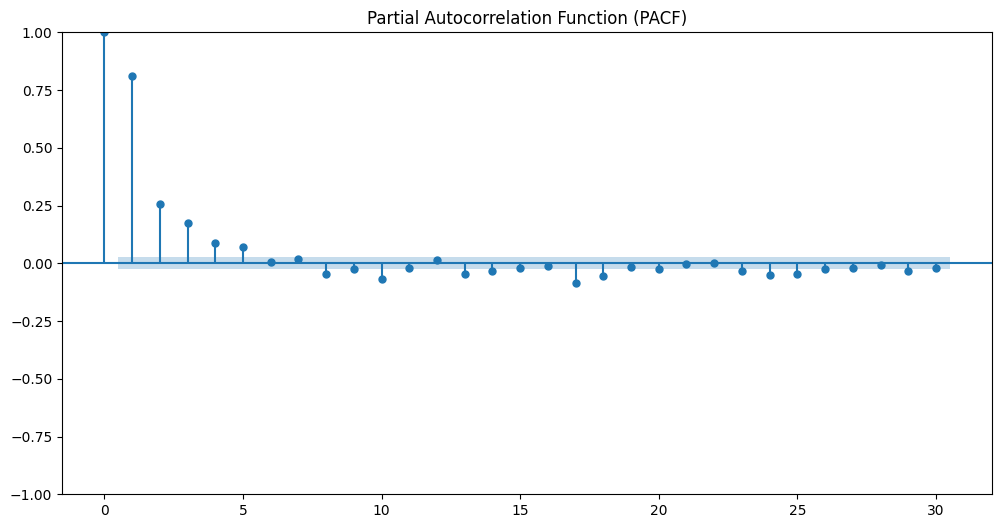

In [43]:
# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(df['transaction_qty'], lags=30, method='ywm', ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [44]:
df

,transaction_date,store_id,product_id,transaction_qty,month,week,quarter
0,2023-01-02,3,22,15.0,1,1,1
1,2023-01-02,3,23,17.0,1,1,1
2,2023-01-02,3,24,20.0,1,1,1
3,2023-01-02,3,25,12.0,1,1,1
4,2023-01-02,3,26,15.0,1,1,1
...,...,...,...,...,...,...,...
5840,2023-07-03,8,77,16.0,7,27,3
5841,2023-07-03,8,78,21.0,7,27,3
5842,2023-07-03,8,79,16.0,7,27,3
5843,2023-07-03,8,84,22.0,7,27,3


In [45]:
df["store_id"].value_counts()

store_id
5    1985
8    1983
3    1877
Name: count, dtype: int64

In [46]:
df.columns

Index(['transaction_date', 'store_id', 'product_id', 'transaction_qty',
       'month', 'week', 'quarter'],
      dtype='object')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  5845 non-null   datetime64[ns]
 1   store_id          5845 non-null   int64         
 2   product_id        5845 non-null   int64         
 3   transaction_qty   5845 non-null   float64       
 4   month             5845 non-null   int32         
 5   week              5845 non-null   UInt32        
 6   quarter           5845 non-null   int32         
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(2), int64(2)
memory usage: 257.0 KB


# Model Creation...

In [48]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
import numpy as np

In [49]:

# input features and output feature...
df['transaction_date'] = df['transaction_date'].map(pd.Timestamp.toordinal)  # Convert dates to numeric

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_date  5845 non-null   int64  
 1   store_id          5845 non-null   int64  
 2   product_id        5845 non-null   int64  
 3   transaction_qty   5845 non-null   float64
 4   month             5845 non-null   int32  
 5   week              5845 non-null   UInt32 
 6   quarter           5845 non-null   int32  
dtypes: UInt32(1), float64(1), int32(2), int64(3)
memory usage: 257.0 KB


In [51]:
X = df[['transaction_date', 'store_id', 'product_id', 'month', 'week', 'quarter']]
y = df['transaction_qty']

In [52]:
# train test split...
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

In [53]:
# Train the XGBoost model...
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [56]:
# predictions..
y_pred = xgb_model.predict(X_test)
y_train_pred = xgb_model.predict(X_train)

In [57]:
# Evaluate the model...
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

# Display results..
evaluation_metrics = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "R-squared (R2)": r2
}

evaluation_metrics

{'Mean Absolute Error (MAE)': 5.207910747113546,
 'Mean Squared Error (MSE)': 53.61383176705881,
 'Root Mean Squared Error (RMSE)': np.float64(7.322146663858818),
 'R-squared (R2)': 0.9115771162999811}

In [ ]:
# Evaluate the model...
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results..
evaluation_metrics = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "R-squared (R2)": r2
}

evaluation_metrics

{'Mean Absolute Error (MAE)': 12.792466673308503,
 'Mean Squared Error (MSE)': 334.5432439885167,
 'Root Mean Squared Error (RMSE)': np.float64(18.290523338289603),
 'R-squared (R2)': 0.7017488808457384}